---
<img src="https://raw.githubusercontent.com/scipy/scipy/main/doc/source/_static/logo.svg" width="20%" alt="SciPy" title="SciPy"><span style="font-size: 3em">SciPy</span>
=====

# 1 - Présentation
[SciPy](https://scipy.org) - prononcer *sigh-Py* - s'appuie sur **NumPy** pour proposer des fonctions avancées dans le domaine du calcul scientifique. La finance peut notamment tirer parti de ses outils d'intégration, de dérivation, d'interpolation et enfin d'optimisation.

Elle dispose, comme pour les autres librairies de fonctions, d'une [documentation très complète](https://docs.scipy.org/doc/scipy/) en anglais.

**DataCamp** met également à disposition une [référence rapide](https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python) sur ses outils d'algèbre linéaire.

Elle s'importe conventionnellement avec l'alias `sci`.

In [1]:
import scipy as sci
import numpy as np #SciPy s'appuie sur les structure Numpy, on aura férquemment besoin de ses fonctions pour alimenter les outils de SciPy

# 2 - Intégration et dérivée de fonction

**SciPy** fournir des fonctions pour des intégrations de fonctions à une ou plusieurs variables. [Détails](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
A noter: [SymPy](http://sympy.org/) permet d'intégrer et dériver des fonctions de manière symbolique avant de calculer numériquement le résultat. Par ailleurs les calculs de dérivés seront prochainement retirés de **SciPy** seulement accessibles dans des packages spécifiques **findiff** et **numdifftools**.

Exemple :  
Soit $f(x) = x^3+2x-2$

On veut calculer $\int_0^2 f(x)dx$ ainsi que $f'(2)$ et $f''(2)$

In [2]:
sci.integrate.quad(lambda x: x**3+2*x-2, 0, 2) # retourne l'intégrale et une estimation de l'erreur sur l'intégrale

(3.9999999999999996, 6.356046425314959e-14)

In [3]:
try:
    print(sci.derivative (lambda x: x**3+2*x-2,2,n=1)) # n reçoit l'ordre de la dérivée
except Exception:
    print("fonction désormais sortie de SciPy")    
    pass

fonction désormais sortie de SciPy


In [4]:
try:
    print(sci.derivative (lambda x: x**3+2*x-2,2,n=2)) # n reçoit l'ordre de la dérivée
except Exception:
    print("fonction désormais sortie de SciPy")

fonction désormais sortie de SciPy


# 3 - Interpolation de fonction à partir d'un échantillon de points

SciPy peut produire des [interpolations](https://docs.scipy.org/doc/scipy/reference/interpolate.html) linéaires, cubiques ou à base de splines.

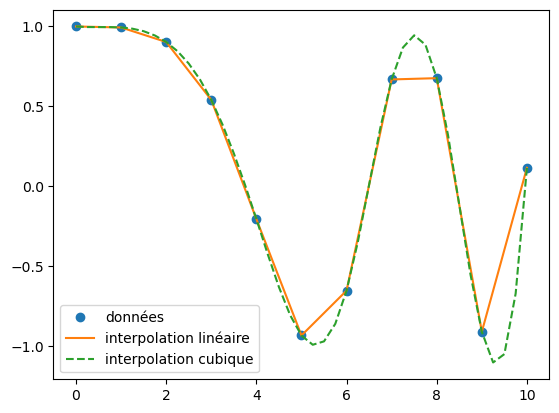

In [5]:
x = np.linspace(0, 10, num=11, endpoint=True) # génération de 11 valeurs discrètes de la fonction cos(-x**2/9) 
y = np.cos(-x**2/9.0)
f = sci.interpolate.interp1d(x, y) # interpolation linéaire par défaut
f2 = sci.interpolate.interp1d(x, y, kind='cubic') #interpolation cubique si demandée
xnew = np.linspace(0, 10, num=41, endpoint=True) # 41 nouveaux abscisses
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['données', 'interpolation linéaire', 'interpolation cubique'], loc='best')
plt.show()

# 4 - Optimisation

## 4.1 - Racine de fonction

ScyPy fournit entre autres les fonctions [root_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html) et [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html), utilisées ici pour calculer le taux actuariel à l'émission d'une obligation au pair et à remboursement _in fine_ de 1000 € au taux de 3% (et dans ce cas le taux aisément vérifiable car c'est le même que le taux de coupon).

In [6]:
van=lambda i: -1000+30/(1+i)+30/(1+i)**2+1030/(1+i)**3
sci.optimize.root_scalar(van,bracket=[0,1])

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.030000000000000023

In [7]:
sci.optimize.fsolve(van,[0,1])

array([0.03, 0.03])

## 4.2 -  Optimisation linéaire

ScyPy ne gère pas les problèmes discrets (contraintes d'entiers) Dans ce cas le package [PYTHON-MIP](https://www.python-mip.com/) peut prendre le relais.

Soit le problème suivant présentée dans la [documentation de ScyPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) :

$$\underset{x_0,x_1}{min} -x_0 + 4x_1$$

sous contraintes :

$$-3x_0 + x1 \leq 6$$
$$-x_0 - 2x_1 \geq -4$$
$$x1 \geq 3$$

La fonction objectif à optimiser est présentée sous la forme de la liste des coefficients linéaires multipliant les différentes variables. Elle a autant de coefficients, éventuellement nuls si les variables ne servent pas directement la fonction objectif, qu'il y a de variables. L'optimisation opérée est toujours une minimisation : vous devez donc opposer tous les coefficients de la fonction objectif en cas de maximisation.
Les contraintes sont présentées de telle manière à ce qu'il y ait uniquement une constrante après l'inégalité et sous forme matricielle :  
* d'abord par une matrice représentant une contrainte par ligne et sur chaque ligne, dans le même ordre que pour la fonction objectif, les coefficients de toutes les variables (éventuellement nuls si la variable concernée ne participe aps à la contrainte) formant la partie gauche de la contrainte (avant l'inégalité). Si la contrainte présente une inégalité de type $\geq$, il convient d'opposer les signes de chacun des coefficients de la ligne.  
* ensuite par une matrice des parties droites de contraintes, c'est à dire, dans l'ordre des contraintes, des coefficients qui composent la partie droite. En cas d'inégalité de type $\geq$, le coefficient doit également être opposé comme en partie gauche.
Vous pouvez en outre spécifier des contraintes portant sur une seule variable sous la forme de contraintes présentant les limites min et max (**None** si pas de contrainte).

In [8]:
objectif = [-1, 4]
partie_gauche_contraintes = [[-3, 1], [1, 2]]
partie_droite_contraintes = [6, 4]
intervalle_x0 = (None, None)
intervalle_x1 = (-3, None)
sci.optimize.linprog(objectif, A_ub=partie_gauche_contraintes, b_ub=partie_droite_contraintes, bounds=[intervalle_x0,intervalle_x1])

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -22.0
              x: [ 1.000e+01 -3.000e+00]
            nit: 0
          lower:  residual: [       inf  0.000e+00]
                 marginals: [ 0.000e+00  6.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.900e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Exercice : Sélection de titres dans un portefeuille


Sujet adapté de [Stephen P. Bradley, Arnoldo C. Hax, Thomas L. Magnanti, Applied Mathematical Programming, Addison-Wesley Publishing Company, 1977](http://web.mit.edu/15.053/www/AppliedMathematicalProgramming.pdf) (sujet et sa résolution en page 8).

Un gestionnaire de portefeuille obligataire a 10 millions d'euros à investir.
Les titres obligataires disponibles à l'achat ainsi que leurs caractéristiques sont présentées dans le tableau ci-dessous :

| Obligation |     Type      |  Niveau de Rating  |  Niveau de qualité (numérique) | Maturité en années|  Taux actuariel après impôt|
|:----------:|:-------------:|:------------------:|:------------------------------:|:-----------------:|:--------------------------:|
|    A       | Collectivité  |         Aa         |                2               |              9    |          4,3%              |
|    B       | Administration|         Aa         |                2               |             15    |          2,7%              |
|    C       | Etat          |        Aaa         |                1               |              4    |          2,5%              |
|    D       | Etat          |        Aaa         |                1               |              3    |          2,2%              |
|    E       | Collectivité  |         Ba         |                5               |              2    |          4,5%              |


Le gestionnaire doit en outre suivre les contraintes prudentielles suivantes :

* Au moins 4 millions d'euros doivent être investis en titres d'état ou d'administrations.
* La note de qualité moyenne (moyenne des qualités des titres détenus pondérée par les poids des titres dans le portefeuille) ne peut dépasser 1,4.
* La maturité moyenne du portefeuille (moyenne des maturités des titres détenus pondérée par les poids des titres dans le portefeuille) ne doit pas excéder 5 ans.

#### 1. Problème initial

L'objectif du gestionnaire du portefeuille est de maximiser les revenus après impôt, au regard des taux actuariels après impôt des titres sélectionnés. Quels titres obligataires devra-t-il retenir dans son portefeuille et en quelles proportions ?
Après constitution du système linéaire à résoudre (ou reprise du bas de la page 9 du document proposé), obtenez les solutions à l'aide de la fonction _optimise.linprog_

#### 2. Extension 
S'il était en mesure d'emprunter 1 000 000 € au taux de 2.75%, cela changerait-il la sélection des titres du portefeuille ?

## 4.3 - Optimisation non linéaire

Scipy propose la fonction [_minimize(fonction, valeurs de départ des variables)_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) pour minimiser une fonction à plusieurs variables.

On crée pour cela une fonction (ou une _lambda_) qui calcule le résultat à optimiser à partir d'une liste de valeurs : dans l'exemple qui suit `x` n'est pas une fonction qui calcule un résultat mathématique à partir d'une seule variable mais à partir de deux (`x[0]` et `x[1]`). On peut ainsi faire de l'optimisation à partir d'un nombre quelconque de variables, chacune pouvant évoluer dans des limites (min ou None si pas de limite inférieure,max ou none si pas de limite supérieure).

L'optimisation est toujours une minimisation, aussi si on souhaite maximiser un résultat, il faut que la fonction appelée retourne son opposé (signe - ajouté lors du retour de la valeur)

L'exemple ci-dessous réalise une optimisation à partir de la fonction d'[Himmelblau](https://fr.wikipedia.org/wiki/Fonction_de_Himmelblau) possédant 4 mimimums (source Wikipedia) :
* $f(3,2)=0$,  
* $f ( − 2.805118... , 3.131312... ) = 0 $  
* $f ( − 3.779310... , − 3.283186... ) = 0$  
* $f ( 3.584428... , − 1.848126... ) = 0$  
![graphe de la fonction d'himmelblau](https://upload.wikimedia.org/wikipedia/commons/a/ad/Himmelblau_function.svg)

In [9]:
himmelblau= lambda x: (x[0]*x[0]+x[1]-11)**2+(x[0]+x[1]*x[1]-7)*(x[0]+x[1]*x[1]-7)
x0=[0,0]
limites=[(0,10),(0,10)] # Dans ces limites, seul, un seul minimum est trouvable
sci.optimize.minimize(himmelblau,x0,bounds=limites)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1852479524140986e-15
        x: [ 3.000e+00  2.000e+00]
      nit: 9
      jac: [ 1.223e-07 -1.069e-07]
     nfev: 45
     njev: 15
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Exercice : Ajustement de la duration d'un portefeuille obligataire

Vous disposez d'une somme conséquente à placer sur un horizon de 4 ans. Sachant que dans 4 ans vous aurez nécessairement besoin de ces fonds, vous annulez les risque de signature, liquidité et change en vous portant exclusivement sur des obligations d'état AAA de votre zone ménétaire (vous avez retenu l'émetteur qui propose le meilleur taux actuariel, sensiblement proche de 3,5% quelque soit les échéances retenues). Reste à couvrir le risque de taux et il faut donc que votre portefeuille ait une duration de 4 ans (ou ait une duration la plus proche possible de 4).  
La duration du portefeuille étant la moyenne des durations des obligations pondérée par leur proportion dans le portefeuille, quelles proportions (exclusivement positives ou nulles) des titres suivants permettront à votre portefeuille d'avoir une duration de 4 années ?

|Obligation|Prix coté|Taux de coupon|Maturité|Duration (années)|	
|:-:|:-:|:-:|:-:|:-:|
|Obligation A|100,00%|3,5%|5|4,6731|
|Obligation B|104,20%|5,0%|3|2,8974|
|Obligation C|100,95%|4,0%|2|1,9660|
|Obligation D|100,97%|4,5%|1|1,9660|
|Obligation E|97,74%|3,0%|5|4,6773|
|Obligation F|94,49%|2,0%|4|3,8078|

Pour résoudre le problème il convient de :
* créer une fonction ou lambda recevant un tableau de 6 quantités et retournant la duration du portefeuille correspondant aux proportions issues de ces quantités au regard des prix courants de chacun des titres.
* créer une fonction objectif recevant un tableau de 6 quantités et retournant la valeur absolue de l'écart entre la duration du portefeuille correspondant à ces quantités et l'horizon de 4 années. C'est un objectif à minimiser.
* optimiser d'après les quantités en partant de quantités équiproportionnées (1/6e) et en limitant ces quantités dans l'intervalle [0;1] (inutile d'en faire plus car ce sont les proportions issues de ces quantités qui conditionnent la duration des portefeuilles).
* afficher les proportions du portefeuille issues des quantités à l'optimum et vérifier la duration du portefeuille.